In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential , Model
from tensorflow.keras.layers import Dense
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img, img_to_array

In [3]:
model = VGG16()
model.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
for i in range(len(model.layers)):
    if 'conv' not in model.layers[i].name:
        continue
    filters, biases = model.layers[i].get_weights()
    print("Layer", i , model.layers[i].name, filters.shape)

Layer 1 block1_conv1 (3, 3, 3, 64)
Layer 2 block1_conv2 (3, 3, 64, 64)
Layer 4 block2_conv1 (3, 3, 64, 128)
Layer 5 block2_conv2 (3, 3, 128, 128)
Layer 7 block3_conv1 (3, 3, 128, 256)
Layer 8 block3_conv2 (3, 3, 256, 256)
Layer 9 block3_conv3 (3, 3, 256, 256)
Layer 11 block4_conv1 (3, 3, 256, 512)
Layer 12 block4_conv2 (3, 3, 512, 512)
Layer 13 block4_conv3 (3, 3, 512, 512)
Layer 15 block5_conv1 (3, 3, 512, 512)
Layer 16 block5_conv2 (3, 3, 512, 512)
Layer 17 block5_conv3 (3, 3, 512, 512)


In [5]:
  filters, biases = model.layers[1].get_weights()
  filters

array([[[[ 4.29470569e-01,  1.17273867e-01,  3.40129584e-02, ...,
          -1.32241577e-01, -5.33475243e-02,  7.57738389e-03],
         [ 5.50379455e-01,  2.08774377e-02,  9.88311544e-02, ...,
          -8.48205537e-02, -5.11389151e-02,  3.74943428e-02],
         [ 4.80015397e-01, -1.72696680e-01,  3.75577137e-02, ...,
          -1.27135560e-01, -5.02991639e-02,  3.48965675e-02]],

        [[ 3.73466998e-01,  1.62062630e-01,  1.70863140e-03, ...,
          -1.48207128e-01, -2.35300660e-01, -6.30356818e-02],
         [ 4.40074533e-01,  4.73412387e-02,  5.13819456e-02, ...,
          -9.88498852e-02, -2.96195745e-01, -7.04357103e-02],
         [ 4.08547401e-01, -1.70375049e-01, -4.96297423e-03, ...,
          -1.22360572e-01, -2.76450396e-01, -3.90796512e-02]],

        [[-6.13601133e-02,  1.35693997e-01, -1.15694344e-01, ...,
          -1.40158370e-01, -3.77666801e-01, -3.00509870e-01],
         [-8.13870355e-02,  4.18543853e-02, -1.01763301e-01, ...,
          -9.43124294e-02, -5.0566

In [6]:
# Normalize filter value so easily visualize

f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

In [7]:
filters.shape

(3, 3, 3, 64)

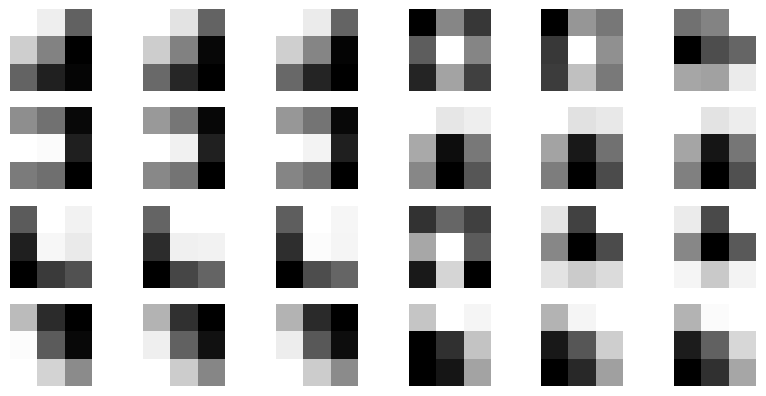

In [8]:
n_filters = 8
ix = 1
fig = plt.figure(figsize=(10, 10)),
for i in range(n_filters):
  f = filters[:, :, :, i]
  for j in range(3):
    ax = plt.subplot(n_filters, 6, ix)
    plt.imshow(f[:, :, j] , cmap='gray')
    plt.axis('off')
    ix += 1
plt.show()


In [9]:
model =  Model(inputs = model.inputs, outputs = model.layers[1].output)

In [10]:
image = load_img('/content/drive/MyDrive/DEEP LEARNING/Data/Sachin.jpg', target_size=(224, 224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = tf.keras.applications.vgg16.preprocess_input(image)

In [11]:
palak =  VGG16()

In [12]:
layer_index = [2,5,9,13,17]
outputs = [palak.layers[i].output for i in layer_index]

bera =  Model(inputs = palak.inputs, outputs = outputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step


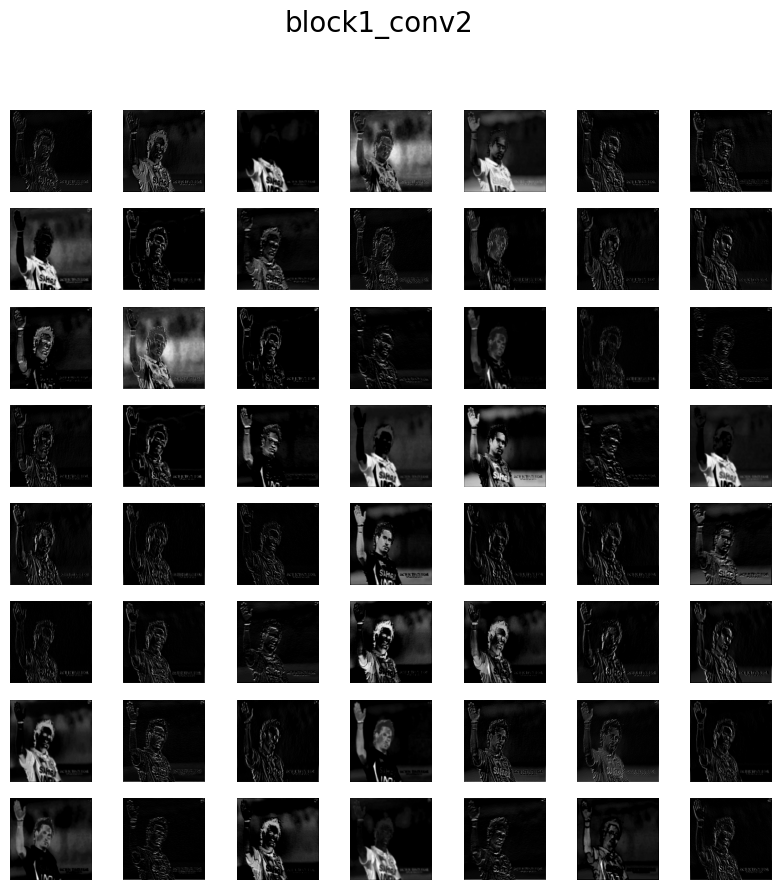

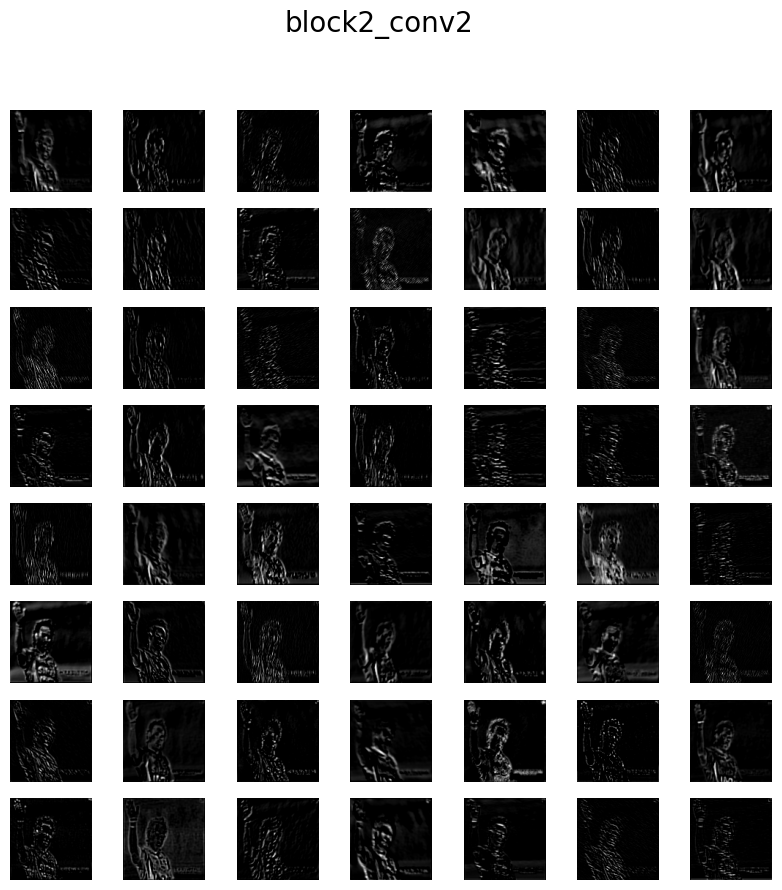

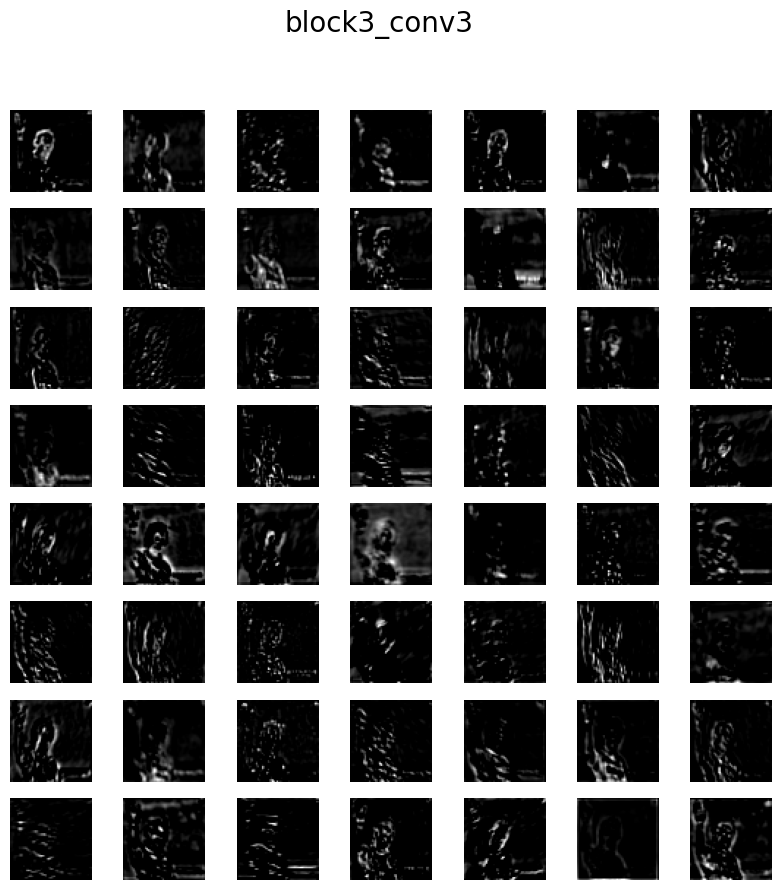

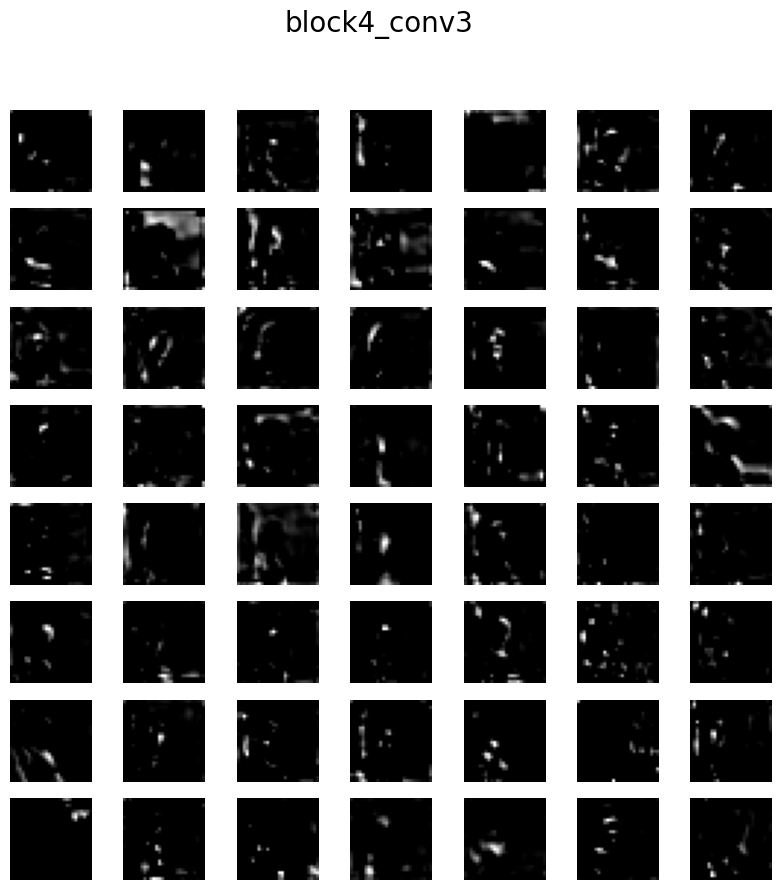

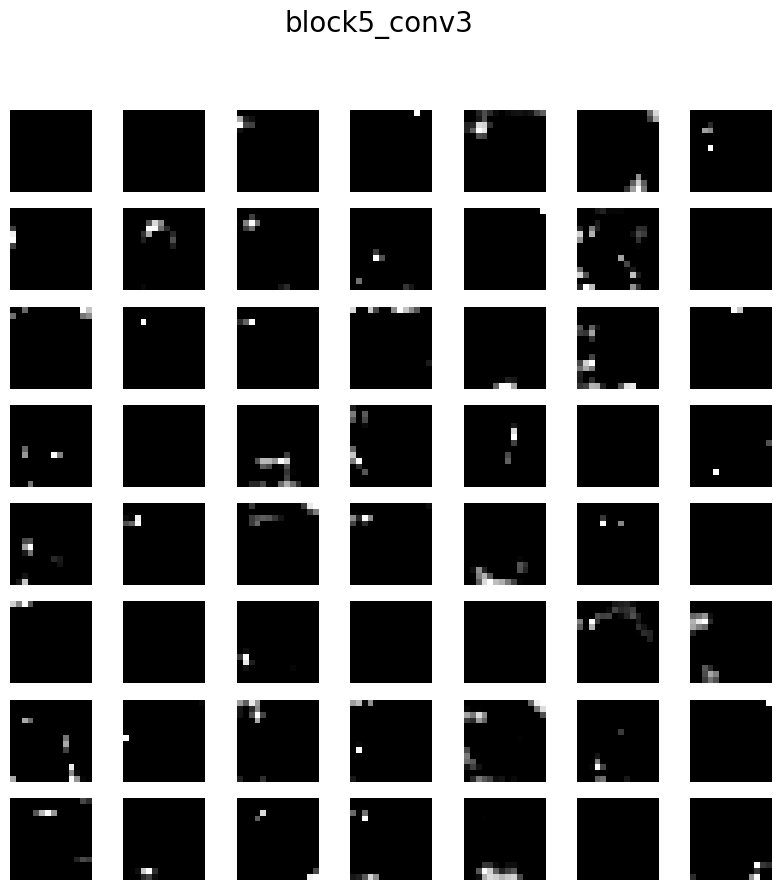

In [16]:
feature_map = bera.predict(image)

for i, fmap in zip(layer_index, feature_map):
    fig = plt.figure(figsize=(10, 10))
    fig.suptitle(bera.layers[i].name, fontsize=20)

    # Calculate the maximum number of plots based on fmap.shape[3] and the grid size
    num_plots = min(fmap.shape[3], 8 * 7)  # 8x7 grid can show up to 56 images

    for j in range(1, num_plots + 1):
        ax = plt.subplot(8, 7, j)
        plt.imshow(fmap[0, :, :, j - 1], cmap='gray')
        plt.axis('off')

    plt.show()
